# Plot 3.2: Comparison with 5PN Model

Plot Description: 

Phase error comparison with a PN trajectory starting at $p \sim 100$ at mass ratio $10^{−3}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from few.trajectory.inspiral import EMRIInspiral

#Importing Flux Trajectory
from few.trajectory.ode import KerrEccEqFlux
flux_traj = EMRIInspiral(func=KerrEccEqFlux)

# Importing 5PN Trajectory
from few.trajectory.ode import PN5
PN_traj = EMRIInspiral(func=PN5)

## Single Trajectory Tests

In [175]:
# Mass ratio 1e-5
M = 1e6
mu = 1e1 

p0 = 12. # As stated in figure description
xI0 = 1.  # Fixed for equatorial mode;

# Can play around with these two
a = 0.9  
e0 = 0.1


T = 4.  # duration of trajectory in years (as defined by few.utils.constants.YRSID_SI)

traj_pars = [M, mu, a, p0, e0, xI0]

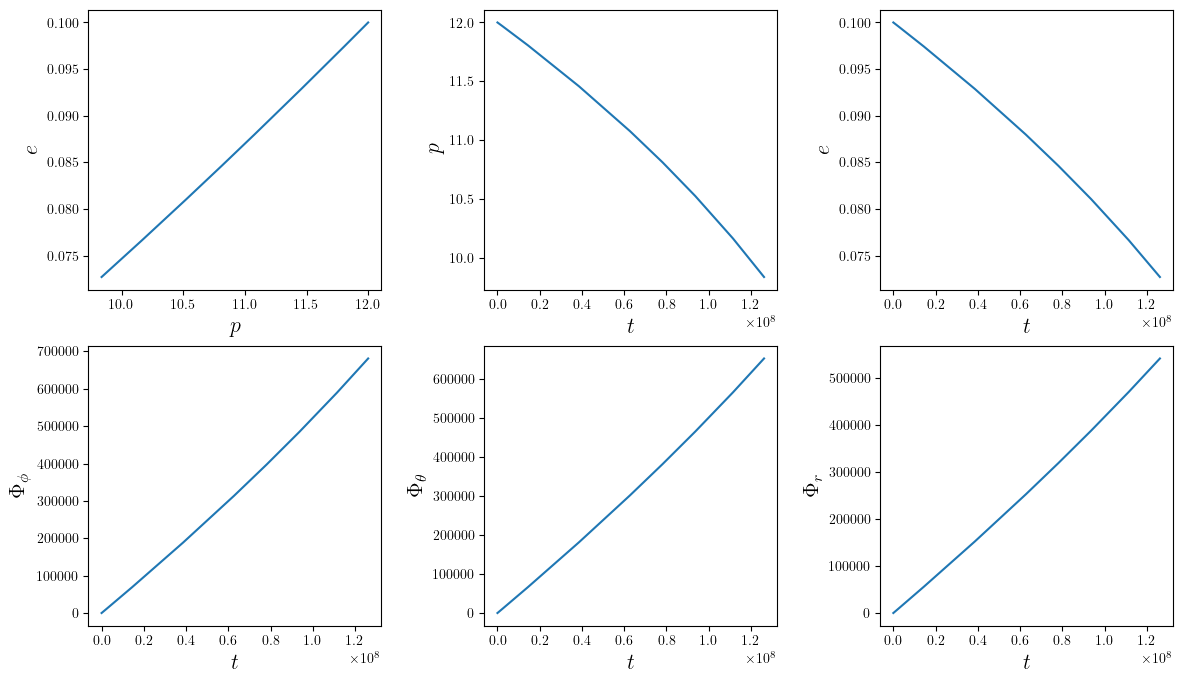

In [176]:
t, p, e, xI, Phi_phi, Phi_theta, Phi_r = flux_traj(*traj_pars, T=T,err=1e-12)

fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.35)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$', r'$\Phi_\theta$', r'$\Phi_r$']
xlabels = [r'$p$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$']
ys = [e, p, e, Phi_phi, Phi_theta, Phi_r]
xs = [p, t, t, t, t, t]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)

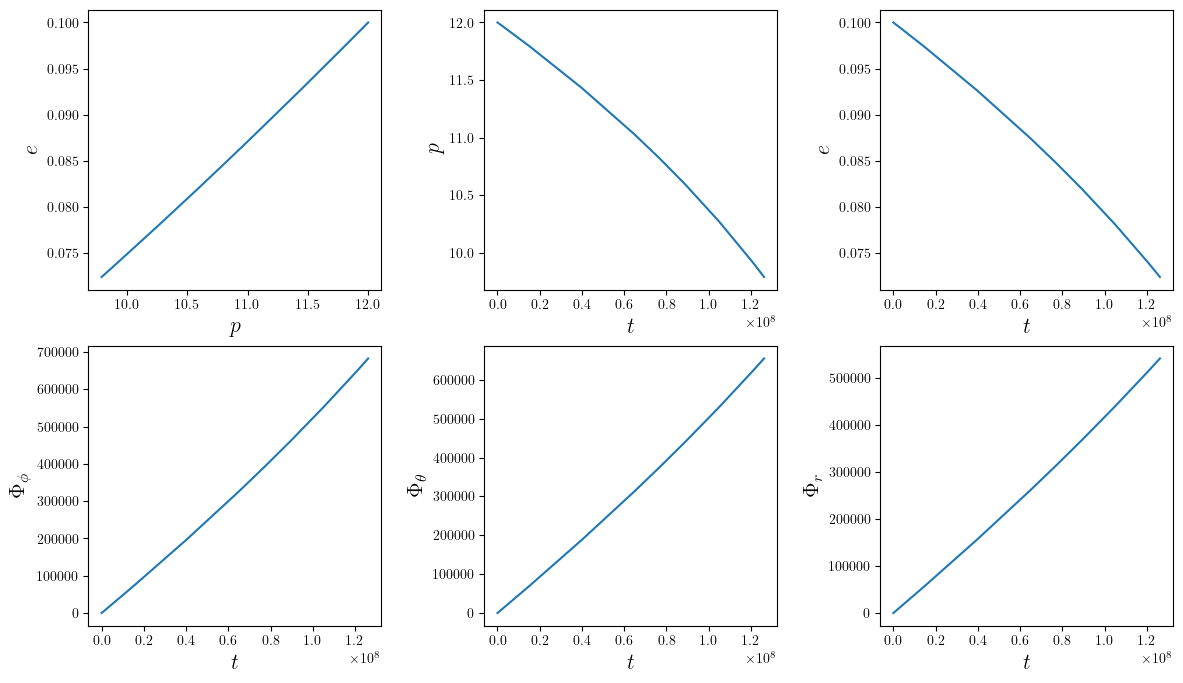

In [177]:
tPN, pPN, ePN, xIPN, Phi_phiPN, Phi_thetaPN, Phi_rPN = PN_traj(*traj_pars, T=T,err=1e-12)

fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.35)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$', r'$\Phi_\theta$', r'$\Phi_r$']
xlabels = [r'$p$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$']
ys = [ePN, pPN, ePN, Phi_phiPN, Phi_thetaPN, Phi_rPN]
xs = [pPN, tPN, tPN, tPN, tPN, tPN]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)

In [180]:
Phi_phi[-1]-Phi_phiPN[-1] # Dephasing

np.float64(-1711.1185640416807)

## Multiple Trajectories

In [3]:
# Adjust masses (in solar masses) to obtain desired mass ratio
M = 1e6
mu = 1e1 

p0 = 100. # As stated in figure description
xI0 = 1.  # Fixed for equatorial (prograde) mode;

# Want to test for each value of spin from -0.9 to 0.9
aArr = np.arange(-0.9,1,0.1)
# We'll also test different values of eccentricity from 0 to 0.8
eArr = np.arange(0,0.9,0.1)
print(len(aArr),len(eArr))
results = np.zeros((len(eArr) ,len(aArr)) )

# Will always use duration of 4 years, as these signals don't plunge in LISA lifetime
T = 4.  # duration of trajectory in years (as defined by few.utils.constants.YRSID_SI)


for i in range(len(eArr)):
    for j in range(len(aArr)):
        traj_pars = [M, mu, aArr[j], p0, eArr[i], xI0]
        # Calculate Flux Trajectory
        t, p, e, xI, Phi_phi, Phi_theta, Phi_r = flux_traj(*traj_pars, T=T,err=1e-12)
        # Calculate PN trajectory
        tPN, pPN, ePN, xIPN, Phi_phiPN, Phi_thetaPN, Phi_rPN = PN_traj(*traj_pars, T=T,err=1e-12)
        # Get dephasing at the end of the inspiral
        dephasing = abs(Phi_phi[-1] - Phi_phiPN[-1])
        results[i ,j] = dephasing


19 9


/Users/philip/opt/anaconda3/envs/few_env/lib/python3.12/site-packages/few/trajectory/inspiral.py:207: UserWarning: Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
  warnings.warn(
/Users/philip/opt/anaconda3/envs/few_env/lib/python3.12/site-packages/few/trajectory/inspiral.py:207: UserWarning: Our model with spin breaks near a = 0. Adjusting to a = 1e-6.
  warnings.warn(


## Plot

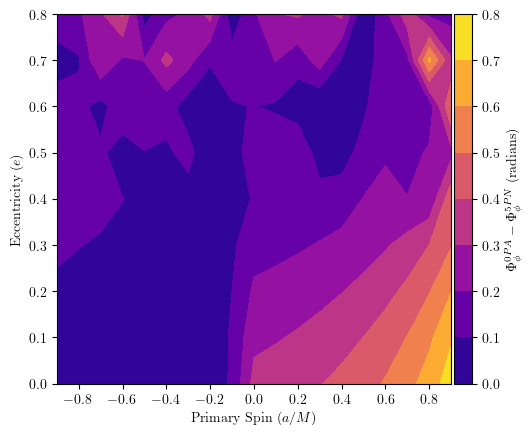

In [6]:
#from seaborn import color_palette
#from matplotlib.colors import ListedColormap
#from seaborn import color_palette


#cmap = ListedColormap(color_palette("colorblind"))

cmap = "plasma"

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]

plt.contourf(aArr,eArr, results, cmap= cmap)
plt.xlabel(r'Primary Spin $(a/M)$')
plt.ylabel(r'Eccentricity $(e)$')
cbar = plt.colorbar( orientation='vertical', fraction=0.2, pad=0.005)
cbar.set_label(r'$ \Phi_\phi^{0PA} - \Phi_\phi^{5PN} $ (radians)')

plt.savefig("3-2-ComparisonWith5PN.pdf")
plt.show()


So this isn't actually all that good. We should expect better.

## Examining difference in p and e fluxes

In [159]:
from few.trajectory.ode import KerrEccEqFlux
rhsFlux = KerrEccEqFlux()

from few.trajectory.ode import PN5
rhsPN = PN5()


M = 1e6  # Solar masses
mu = 1e1  # Solar masses
a = 0.9

rhsFlux.add_fixed_parameters(M, mu, a)

rhsPN.add_fixed_parameters(M, mu, a)


p = 150.
e = 0.2
x = 1.



pdot, edot, xIdot, Omega_phi, Omega_theta, Omega_r = rhsFlux([p, e, x])

pdotPN, edotPN, xIdotPN, Omega_phiPN, Omega_thetaPN, Omega_rPN = rhsPN([p, e, x])

In [165]:
#np.set_printoptions(precision=4, suppress=True)
print(pdot,pdotPN,pdot - pdotPN,1-pdotPN/pdot)

-1.4759348161513038e-05 -3.6443293178266295e-06 -1.1115018843686409e-05 0.7530833152015681


In [168]:
print(edot,edotPN,edot - edotPN,1-edotPN/edot)

-8.388052823099181e-09 -7.528355640502118e-09 -8.596971825970631e-10 0.10249067342895268


In [169]:
print(xIdot,xIdotPN,xIdot - xIdotPN)

0.0 0.0 0.0


In [170]:
print(Omega_phi,Omega_phiPN,Omega_phi - Omega_phiPN,1-Omega_phiPN/Omega_phi)

0.0005121367706024532 0.0005121367706024532 0.0 0.0


In [171]:
print(Omega_r,Omega_rPN,Omega_r - Omega_rPN,1-Omega_rPN/Omega_r)

0.0005027838712632164 0.0005027838712632164 0.0 0.0


So current flux model doesn't recover the PN limit particularly well.